In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pixiedust
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import keras.backend as K

np.set_printoptions(suppress=True)
%matplotlib inline

In [6]:
df = pd.read_csv('tc_bmi.csv')
df.head()

,ID,TC,BMI,BMI_cat,Obese
0,1,158.0,20.2,Normal,0
1,2,181.0,21.7,Normal,0
2,3,192.0,22.0,Normal,0
3,4,164.0,22.8,Normal,0
4,5,201.5,24.6,Normal,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
ID         20 non-null int64
TC         20 non-null float64
BMI        20 non-null float64
BMI_cat    20 non-null object
Obese      20 non-null int64
dtypes: float64(2), int64(2), object(1)
memory usage: 880.0+ bytes


In [7]:
x = df.BMI
y = df.TC

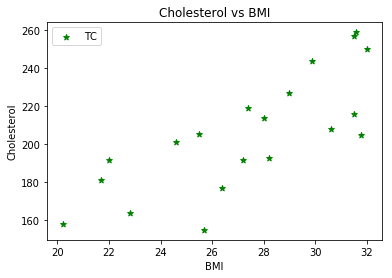

In [10]:
plt.scatter(x, y, color='green', marker='*');
plt.title('Cholesterol vs BMI');
plt.ylabel('Cholesterol');
plt.xlabel('BMI');
plt.legend();

In [42]:
def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [47]:
model = Sequential()
model.add(Dense(units=1, activation='linear', input_shape=(1,), name='Neuron'))

sgd = optimizers.SGD(lr=0.001)
model.compile(loss='mse', optimizer=sgd, metrics=['mse', r2_keras])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Neuron (Dense)               (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [48]:
history = model.fit(x, y, epochs=10, batch_size=10, verbose=2)

Epoch 1/10
 - 0s - loss: 37016.2695 - mean_squared_error: 37016.2695 - r2_keras: -3.9085e+01
Epoch 2/10
 - 0s - loss: 2816.5737 - mean_squared_error: 2816.5737 - r2_keras: -2.0107e+00
Epoch 3/10
 - 0s - loss: 395.3343 - mean_squared_error: 395.3343 - r2_keras: 0.5630
Epoch 4/10
 - 0s - loss: 497.4514 - mean_squared_error: 497.4514 - r2_keras: 0.2931
Epoch 5/10
 - 0s - loss: 401.0207 - mean_squared_error: 401.0207 - r2_keras: 0.4789
Epoch 6/10
 - 0s - loss: 404.9426 - mean_squared_error: 404.9426 - r2_keras: 0.5074
Epoch 7/10
 - 0s - loss: 493.4244 - mean_squared_error: 493.4244 - r2_keras: 0.4153
Epoch 8/10
 - 0s - loss: 389.1238 - mean_squared_error: 389.1238 - r2_keras: 0.4628
Epoch 9/10
 - 0s - loss: 450.8970 - mean_squared_error: 450.8970 - r2_keras: 0.3606
Epoch 10/10
 - 0s - loss: 498.0617 - mean_squared_error: 498.0617 - r2_keras: 0.4177


In [49]:
y_hat = model.predict(x)

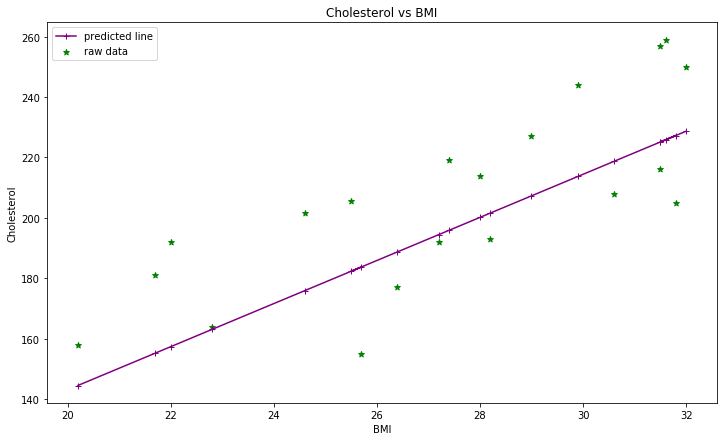

In [50]:
plt.figure(figsize=(12,7))
plt.scatter(x, y, color='green', marker='*', label='raw data');
plt.plot(x, y_hat, color='purple', marker='+', label='predicted line');
plt.title('Cholesterol vs BMI');
plt.ylabel('Cholesterol');
plt.xlabel('BMI')
plt.legend();

In [54]:
history.model.get_weights()

[array([[7.1361575]], dtype=float32), array([0.31312075], dtype=float32)]

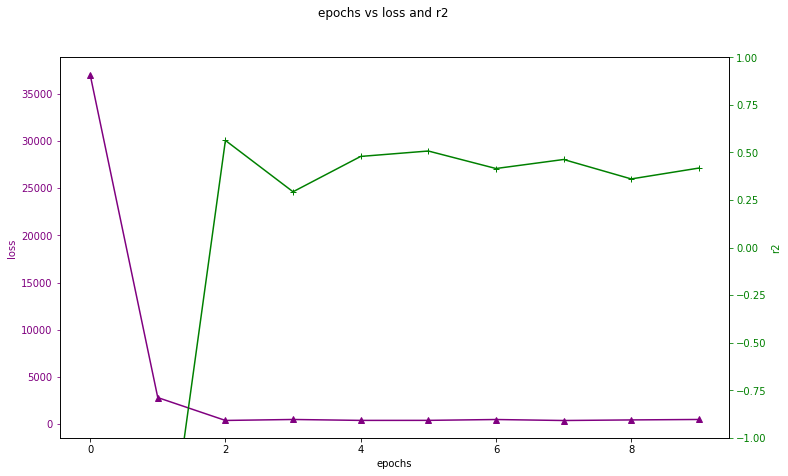

In [94]:
fig, ax1 = plt.subplots(1,1,figsize=(12,7))
ax1.plot(history.epoch, history.history['loss'], marker='^', color='purple')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss', color='purple')
ax1.tick_params('y', colors='purple')

ax2 = ax1.twinx()
plt.plot(history.epoch, history.history['r2_keras'], marker='+', color='green', label='r2')
ax2.set_ylabel('r2', color='green')
ax2.tick_params('y', colors='green')
ax2.set_ylim(-1,1)

fig.suptitle('epochs vs loss and r2');